# 1. Study database

It employs some tools to extract some basic statisitics information such as mean, variance, histogram, etc.

In [1]:
! pip install -q kaggle
from google.colab import userdata
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

# Set your own KAGGLE_KEY and KAGGLE_USERNAME in secrets tab
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

Download dataset


In [2]:
dataset = 'anupaankarigari/ultrasound-nerve-segmentation'

!kaggle datasets download -d $dataset

Dataset URL: https://www.kaggle.com/datasets/anupaankarigari/ultrasound-nerve-segmentation
License(s): unknown
 97% 1.04G/1.07G [00:05<00:00, 181MB/s]
100% 1.07G/1.07G [00:05<00:00, 203MB/s]


Unzip dataset

In [3]:
zip_ref = ZipFile('ultrasound-nerve-segmentation.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Read just single image

Image size (H, W) is: (420, 580)
Data type of image is: uint8


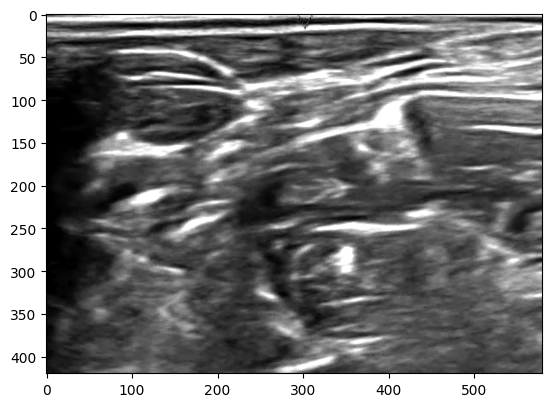

In [4]:
nerve_img = cv2.imread("image/9_99.tif", 0)

# print the size  of image
print("Image size (H, W) is:", nerve_img.shape)

# print data-type of image
print("Data type of image is:", nerve_img.dtype)

# Display image.
plt.imshow(nerve_img, cmap="gray")

Get some statistisc information on image

In [5]:

# Get all pixel intensities as 1D array
pixel_intensities = nerve_img.flatten()

# Calculate basic statistics
mean_intensity = np.mean(pixel_intensities)
variance_intensity = np.var(pixel_intensities)
std_intensity = np.std(pixel_intensities)

print("Mean value: ", mean_intensity)
print("Variance: ", variance_intensity)
print("Standard Deviation: ", std_intensity)

Mean value:  94.41419950738916
Variance:  3542.2290175858125
Standard Deviation:  59.51662807641082


In [6]:
# Additional useful statistics
min_intensity = np.min(pixel_intensities)
max_intensity = np.max(pixel_intensities)
median_intensity = np.median(pixel_intensities)

# Histogram information
hist, bin_edges = np.histogram(pixel_intensities, bins=256, range=(0, 255))

print("Min intesity: ", min_intensity)
print("Max intensity: ", max_intensity)
print("Median intensity: ", median_intensity)




Min intesity:  0
Max intensity:  255
Median intensity:  81.0


(array([4.119e+03, 5.150e+02, 7.430e+02, 7.030e+02, 2.000e+00, 7.540e+02,
        8.450e+02, 8.250e+02, 7.980e+02, 8.610e+02, 8.230e+02, 0.000e+00,
        8.070e+02, 7.720e+02, 7.540e+02, 6.820e+02, 7.680e+02, 9.060e+02,
        2.000e+00, 9.310e+02, 9.430e+02, 9.260e+02, 8.790e+02, 1.003e+03,
        9.780e+02, 6.000e+00, 1.008e+03, 9.800e+02, 9.750e+02, 8.870e+02,
        9.380e+02, 9.950e+02, 2.000e+00, 1.028e+03, 1.092e+03, 1.007e+03,
        1.139e+03, 1.152e+03, 1.193e+03, 6.000e+00, 1.263e+03, 1.370e+03,
        1.447e+03, 1.584e+03, 1.650e+03, 1.771e+03, 2.000e+00, 1.911e+03,
        1.950e+03, 2.056e+03, 2.006e+03, 2.116e+03, 2.069e+03, 0.000e+00,
        2.070e+03, 2.124e+03, 2.184e+03, 2.254e+03, 2.379e+03, 2.368e+03,
        1.000e+00, 2.442e+03, 2.632e+03, 2.586e+03, 2.697e+03, 2.805e+03,
        2.835e+03, 9.000e+00, 2.865e+03, 2.947e+03, 2.855e+03, 2.975e+03,
        3.095e+03, 3.210e+03, 5.000e+00, 3.169e+03, 3.037e+03, 3.046e+03,
        2.989e+03, 2.828e+03, 2.795e+0

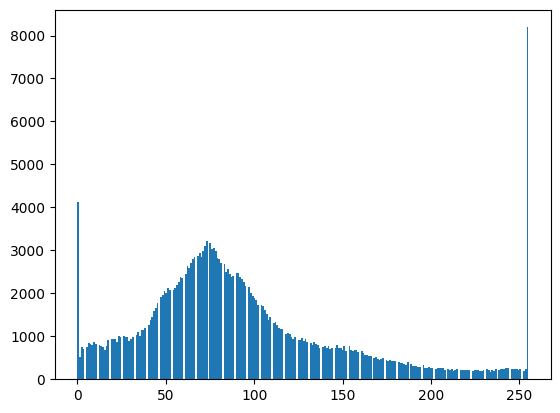

In [7]:
plt.hist(bin_edges[:-1], bin_edges, weights=hist)

Read a show mask image

Image size (H, W) is: (420, 580)
Data type of image is: uint8


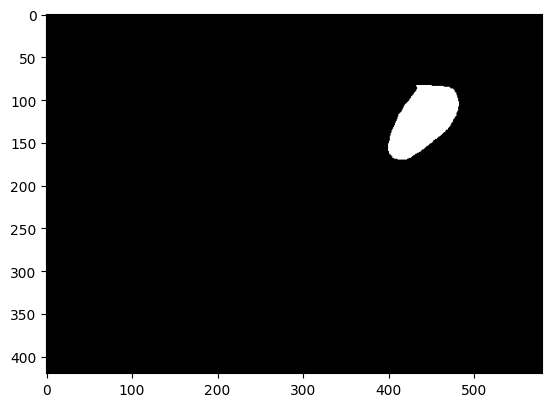

In [8]:
mask_img = cv2.imread("mask/1_1_mask.tif", 0)

# print the size  of image
print("Image size (H, W) is:", mask_img.shape)

# print data-type of image
print("Data type of image is:", mask_img.dtype)

# Display image.
plt.imshow(mask_img, cmap="gray")

Determine size of pixels on a mask image

In [9]:
def mask_size_calculation(binary_image):
  # Find coordinates of all white pixels
  white_pixels = np.column_stack(np.where(binary_image > 0))

  if len(white_pixels) < 2:
        return None

  # Columns
  # [row_value column_value]
  # ...
  # [[ 84 433]
  # [ 84 434]
  # [ 84 435]
  # ...
  # [170 419]
  # [170 420]
  # [170 421]]

  min_indices = np.argmin(white_pixels, axis=0)
  min_values = white_pixels[min_indices]
  # np.argmin(white_pixels, axis=0) will bring two indices values because
  # there is a minimum value per colum. One for y-axis and second one for x-axis

  # First item will be to y-axis (height, row-axis) and second one will be x-axis (width, column-axis)
  # [[ 84 433]
  # [152 400]]

  max_indices = np.argmax(white_pixels, axis=0)
  max_values = white_pixels[max_indices]
  # Same thing above but with maximum values
  # [[170 411]
  # [103 482]]

  height_size = max_values[0,0] - min_values[0,0]
  width_size = max_values[1,1] - min_values[1,1]

  return np.array([[height_size, width_size]])


We're going to look at how previous function can find height and width size of a mask image

In [10]:
height_width_sizes = mask_size_calculation(mask_img)

print("Mask size (H,W) in pixel units is:", height_width_sizes)
print("Shape", height_width_sizes.shape)


Mask size (H,W) in pixel units is: [[86 82]]
Shape (1, 2)


We're going to determine the mask size "height" and "width" of each mask image in the dataset.

Also, we're going to go over which images have no ROIs "Region of interests"

In [11]:
!pip install natsort
from natsort import natsorted

mask_directory_path = './mask'

filenames = [f for f in os.listdir(mask_directory_path)
             if os.path.isfile(os.path.join(mask_directory_path, f))]

mask_sizes = np.empty((1,2))
masks_with_roi = []
images_without_roi = []
for i in range(len(filenames)):
  filename = 'mask/' + filenames[i]
  mask_img_file = cv2.imread(filename, 0)
  mask_size_value = mask_size_calculation(mask_img_file)

  if mask_size_value is not None:
    mask_sizes = np.append(mask_sizes, mask_size_value, axis=0)
    masks_with_roi.append(filenames[i])
  else:
    images_without_roi.append(filenames[i])

masks_with_roi = natsorted(masks_with_roi);
print(mask_sizes)

[[2.275e-320 4.699e-321]
 [1.280e+002 1.200e+002]
 [1.070e+002 9.200e+001]
 ...
 [1.350e+002 8.300e+001]
 [1.470e+002 1.310e+002]
 [1.270e+002 1.190e+002]]


We're going to determine height and width on avarage of all the masks

In [12]:
size_average = np.mean(mask_sizes, axis=0)
print("Height and width on average", size_average, "pixels")

Height and width on average [116.77796902  91.39716007] pixels


We saved in a list some images that have no ROI and we can determine the amount of them and which they are

In [13]:
print("Number of mask images without ROI:",len(images_without_roi))
print("Number of mask images:", len(filenames))
print("Number of mask images with ROI:", len(filenames) - len(images_without_roi))
print(images_without_roi)

Number of mask images without ROI: 3312
Number of mask images: 5635
Number of mask images with ROI: 2323
['1_76_mask.tif', '25_102_mask.tif', '43_22_mask.tif', '12_116_mask.tif', '21_93_mask.tif', '46_21_mask.tif', '4_107_mask.tif', '8_116_mask.tif', '47_17_mask.tif', '14_119_mask.tif', '46_1_mask.tif', '47_88_mask.tif', '29_111_mask.tif', '22_54_mask.tif', '14_56_mask.tif', '45_61_mask.tif', '5_82_mask.tif', '43_102_mask.tif', '14_97_mask.tif', '18_10_mask.tif', '12_114_mask.tif', '24_106_mask.tif', '39_39_mask.tif', '11_79_mask.tif', '15_76_mask.tif', '31_97_mask.tif', '30_10_mask.tif', '14_111_mask.tif', '14_44_mask.tif', '8_84_mask.tif', '3_42_mask.tif', '12_13_mask.tif', '6_17_mask.tif', '27_33_mask.tif', '20_40_mask.tif', '14_37_mask.tif', '1_116_mask.tif', '14_51_mask.tif', '5_25_mask.tif', '35_25_mask.tif', '46_47_mask.tif', '22_81_mask.tif', '44_91_mask.tif', '30_62_mask.tif', '21_10_mask.tif', '7_91_mask.tif', '17_69_mask.tif', '17_49_mask.tif', '25_39_mask.tif', '28_80_mask.

We can confirm it employing some image from previous list

Image size (H, W) is: (420, 580)
Data type of image is: uint8


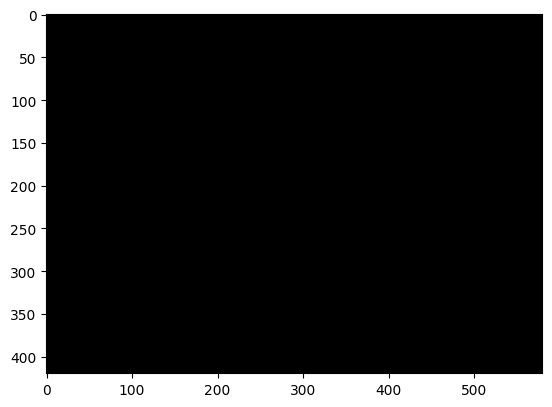

In [14]:
mask_img_without_roi = cv2.imread("mask/27_45_mask.tif", 0)

# print the size  of image
print("Image size (H, W) is:", mask_img_without_roi.shape)

# print data-type of image
print("Data type of image is:", mask_img_without_roi.dtype)

# Display image.
plt.imshow(mask_img_without_roi, cmap="gray")

We're going to choose images based available masks

In [15]:
image_directory_path = './image'
image_filenames = [f for f in os.listdir(image_directory_path)
             if os.path.isfile(os.path.join(image_directory_path, f))]

matched_images = []
for i in range(len(masks_with_roi)):
  mask_filename = masks_with_roi[i].replace('_mask','')
  for j in range(len(image_filenames)):
    image_filename = image_filenames[j]
    if mask_filename == image_filename:
      matched_images.append(image_filename)

matched_images = natsorted(matched_images)


Let's summarize our results. We want to hightlight how many images have mask with ROI

In [16]:
print("Number of images:", len(image_filenames))
print("Number of mask images:", len(filenames))
print("Number of mask images without ROI:",len(images_without_roi))
print("Number of mask images with ROI:", len(masks_with_roi))
print("Number of images that belongs to mask with ROI:", len(matched_images))
print(matched_images)
print(masks_with_roi)

Number of images: 5635
Number of mask images: 5635
Number of mask images without ROI: 3312
Number of mask images with ROI: 2323
Number of images that belongs to mask with ROI: 2323
['1_1.tif', '1_2.tif', '1_3.tif', '1_4.tif', '1_7.tif', '1_14.tif', '1_15.tif', '1_17.tif', '1_20.tif', '1_23.tif', '1_24.tif', '1_27.tif', '1_29.tif', '1_32.tif', '1_33.tif', '1_36.tif', '1_37.tif', '1_39.tif', '1_42.tif', '1_43.tif', '1_44.tif', '1_45.tif', '1_49.tif', '1_50.tif', '1_51.tif', '1_52.tif', '1_53.tif', '1_54.tif', '1_56.tif', '1_57.tif', '1_61.tif', '1_66.tif', '1_67.tif', '1_74.tif', '1_75.tif', '1_80.tif', '1_85.tif', '1_87.tif', '1_88.tif', '1_89.tif', '1_90.tif', '1_91.tif', '1_92.tif', '1_96.tif', '1_101.tif', '1_104.tif', '1_106.tif', '1_107.tif', '1_108.tif', '1_109.tif', '1_111.tif', '1_113.tif', '1_118.tif', '1_119.tif', '2_8.tif', '2_12.tif', '2_23.tif', '2_54.tif', '2_58.tif', '2_59.tif', '2_62.tif', '2_77.tif', '2_81.tif', '2_84.tif', '2_94.tif', '3_1.tif', '3_4.tif', '3_5.tif', '

We're going to create new folders for images and masks with ROI

In [17]:
folder_names = ['truth_image', 'truth_mask']
base_path = "/content/" # Or specify your desired base path

for name in folder_names:
    folder_path = os.path.join(base_path, name)
    os.makedirs(folder_path, exist_ok=True) # exist_ok=True prevents error if folder exists
    print(f"Created folder: {folder_path}")

Created folder: /content/truth_image
Created folder: /content/truth_mask


In [18]:
import shutil

source_mask_folder = "/content/mask"
destination_truth_mask_folder = "/content/truth_mask"

source_image_folder = "/content/image"
destination_truth_image_folder = "/content/truth_image"

for i in range(len(matched_images)):
  # masks
  source_mask_path = os.path.join(source_mask_folder, masks_with_roi[i])
  destination_truth_mask_path = os.path.join(destination_truth_mask_folder, masks_with_roi[i])
  shutil.copy(source_mask_path, destination_truth_mask_path)
  # images
  source_image_path = os.path.join(source_image_folder, matched_images[i])
  destination_truth_image_path = os.path.join(destination_truth_image_folder, matched_images[i])
  shutil.copy(source_image_path, destination_truth_image_path)

# 2. Pre-process dataset

We're going to apply CLAHE on the whole dataset

In [19]:
def adaptive_histogram_equalization(image_path, clip_limit=2.0, tile_size=(8, 8)):
    """
    Apply Contrast Limited Adaptive Histogram Equalization (CLAHE).

    Args:
        image_path: Path to the input image
        clip_limit: Threshold for contrast limiting (default: 2.0)
        tile_size: Size of grid for histogram equalization (default: 8x8)

    Returns:
        Original image and CLAHE-processed image
    """
    # Read image
    img = cv2.imread(image_path)

    # Convert to grayscale if needed
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)

    # Apply CLAHE
    clahe_img = clahe.apply(gray)

    return gray, clahe_img

Create a folder to store pre-processed images

In [20]:
folder_names = ['processed_image']
base_path = "/content/" # Or specify your desired base path

for name in folder_names:
    folder_path = os.path.join(base_path, name)
    os.makedirs(folder_path, exist_ok=True) # exist_ok=True prevents error if folder exists
    print(f"Created folder: {folder_path}")

Created folder: /content/processed_image


Run pre-processing

In [21]:
for i in range(len(matched_images)):
  base_path = "/content/truth_image/"
  image_path = os.path.join(base_path, matched_images[i])
  orig, clahe = adaptive_histogram_equalization(image_path, clip_limit=2.0, tile_size=(8, 8))
  base_path = "/content/processed_image/"
  folder_path = os.path.join(base_path, matched_images[i])
  cv2.imwrite(folder_path, clahe)

We're going to show a random example

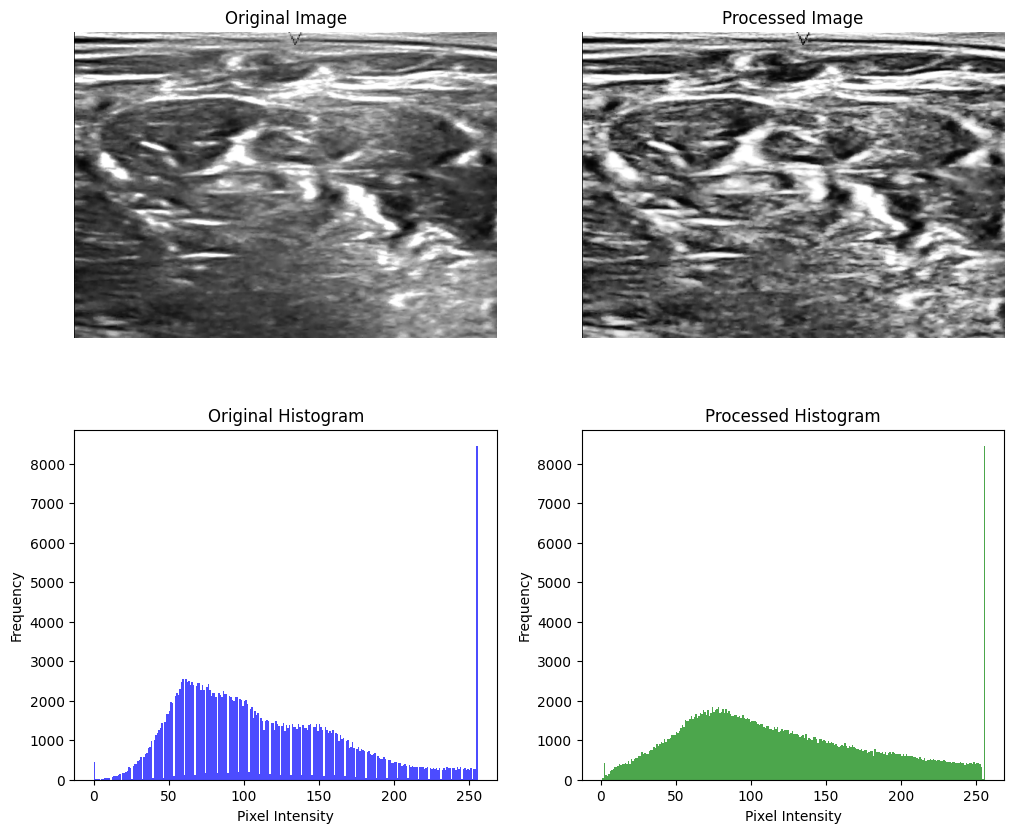

In [22]:
original = cv2.imread("truth_image/10_1.tif", 0)
processed = cv2.imread("processed_image/10_1.tif", 0)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(original, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Processed image
axes[0, 1].imshow(processed, cmap='gray')
axes[0, 1].set_title('Processed Image')
axes[0, 1].axis('off')

# Original histogram
axes[1, 0].hist(original.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[1, 0].set_title('Original Histogram')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

# Processed histogram
axes[1, 1].hist(processed.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
axes[1, 1].set_title('Processed Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.show()

# 3. Split dataset in their train/test sets

We want to generate a set of train and test


In [23]:
train_masks = []
train_images = []
test_masks = []
test_images = []

train_percentage = 70

for i in range(len(masks_with_roi)):
  if i < (round(len(masks_with_roi) * (train_percentage / 100))):
    train_masks.append(masks_with_roi[i])
    train_images.append(matched_images[i])
  else:
    test_masks.append(masks_with_roi[i])
    test_images.append(matched_images[i])

We're going to show results down below

In [24]:
print("Number of train masks", len(train_masks))
print("Number of test masks", len(test_masks))
print("Number of train images", len(train_images))
print("Number of test images", len(test_images))


Number of train masks 1626
Number of test masks 697
Number of train images 1626
Number of test images 697


Create test and train folders

In [25]:

folder_names = ['train_images', 'train_masks', 'test_images', 'test_masks']
base_path = "/content/" # Or specify your desired base path

for name in folder_names:
    folder_path = os.path.join(base_path, name)
    os.makedirs(folder_path, exist_ok=True) # exist_ok=True prevents error if folder exists
    print(f"Created folder: {folder_path}")

Created folder: /content/train_images
Created folder: /content/train_masks
Created folder: /content/test_images
Created folder: /content/test_masks


In [26]:
import shutil

source_mask_folder = "/content/truth_mask"
destination_train_mask_folder = "/content/train_masks"

source_image_folder = "/content/processed_image"
destination_train_image_folder = "/content/train_images"

for i in range(len(train_masks)):
  # train masks
  source_mask_path = os.path.join(source_mask_folder, train_masks[i])
  destination_train_mask_path = os.path.join(destination_train_mask_folder, train_masks[i])
  shutil.copy(source_mask_path, destination_train_mask_path)
  # train images
  source_image_path = os.path.join(source_image_folder, train_images[i])
  destination_train_image_path = os.path.join(destination_train_image_folder, train_images[i])
  shutil.copy(source_image_path, destination_train_image_path)


In [27]:
source_mask_folder = "/content/truth_mask"
destination_test_mask_folder = "/content/test_masks"

source_image_folder = "/content/processed_image"
destination_test_image_folder = "/content/test_images"

for i in range(len(test_masks)):
  # test masks
  source_mask_path = os.path.join(source_mask_folder, test_masks[i])
  destination_test_mask_path = os.path.join(destination_test_mask_folder, test_masks[i])
  shutil.copy(source_mask_path, destination_test_mask_path)
  # test images
  source_image_path = os.path.join(source_image_folder, test_images[i])
  destination_train_image_path = os.path.join(destination_test_image_folder, test_images[i])
  shutil.copy(source_image_path, destination_train_image_path)

# 4. Segmantation Semantica

In [28]:
!pip install segmentation-models-pytorch
!pip install torchmetrics
!pip install albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 58.5 MB/s eta 0:00:00


# Preparar los dataloaders

In [29]:
import torch
import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T

import torch
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Se definen algunas transformaciones para hacer data augmentation y reducir el
# sobreajuste.
train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(mean=(0.485, 0.456, 0.406),  # si usas imagenet-pretrained encoder
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# Se define una base de datos custom.
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted([f for f in os.listdir(image_dir) if f.endswith(('.tif'))])
        self.masks = sorted([f for f in os.listdir(mask_dir) if f.endswith(('.tif'))])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.masks[idx])

        image = np.array(Image.open(img_path))
        mask = np.array(Image.open(mask_path))#[:, :, 0]  # solo un canal
        # Hay una clase quese debe ignorar, porque no coresponde con ninguna
        # estructura de interés.
        mask = np.where(mask == 2, 255, mask)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = (augmented['mask']/255).long()  # asegúrate que sea long para CrossEntropyLoss

        return image, mask

In [30]:
# Se genera la base de datos para el conjunto de train.

# Las rutas para las carpetas de imágenes y máscaras.
image_dir = '/content/train_images'
mask_dir = '/content/train_masks'

# Se genera el dataset.
dataset = SegmentationDataset(image_dir, mask_dir,
                               transform=train_transform)

# Se genera el dataloader.
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

print(f"Número de imágenes: {len(dataset)}")
print(f"Número de batches: {len(dataloader)}")

# Prueba una muestra
img, msk = dataset[0]
print(f"Image shape: {img.shape}, Mask shape: {msk.shape}, Unique labels: {msk.unique()}")

Número de imágenes: 1626
Número de batches: 102
Image shape: torch.Size([1, 420, 580]), Mask shape: torch.Size([420, 580]), Unique labels: tensor([0, 1])


Forma de la imagen: (420, 580, 3)
Forma de la máscara: (420, 580)
Etiquetas únicas en la máscara: [0 1]


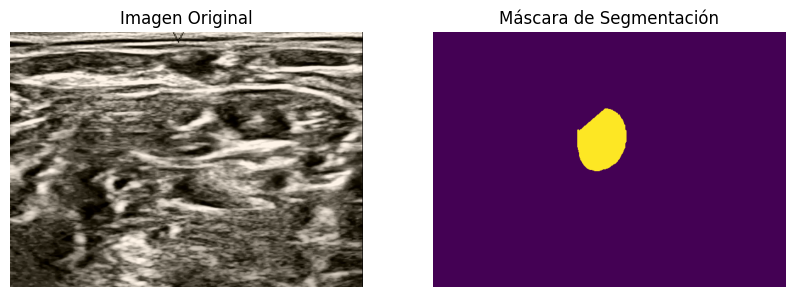

In [31]:
import matplotlib.pyplot as plt

# Muestra una imagen y su máscara
img, msk = dataset[1]

# Convertir el tensor de imagen a un array de numpy y cambiar el orden de los
# canales para visualización (C, H, W -> H, W, C)
# Para visualizar, es común querer la imagen en el rango [0, 1] o [0, 255]
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img_np = img.permute(1, 2, 0).numpy() * std + mean
img_np = np.clip(img_np, 0, 1) # Asegurarse de que los valores estén en el rango [0, 1]

# Convertir el tensor de máscara a un array de numpy
msk_np = msk.numpy()

print("Forma de la imagen:", img_np.shape)
print("Forma de la máscara:", msk_np.shape)
print("Etiquetas únicas en la máscara:", np.unique(msk_np))

# Visualizar la imagen y la máscara
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(msk_np, cmap='viridis') # Usar un mapa de colores para visualizar las diferentes clases
plt.title("Máscara de Segmentación")
plt.axis('off')

plt.show()

In [32]:
# Se genera la base de datos para el conjunto de test.

# Las rutas para las carpetas de imágenes y máscaras.
image_dir = '/content/test_images'
mask_dir = '/content/test_masks'

dataset_test = SegmentationDataset(image_dir, mask_dir,
                               transform=train_transform)

dataloader_test = DataLoader(dataset_test, batch_size=16, shuffle=True)

print(f"Número de imágenes: {len(dataset_test)}")
print(f"Número de batches: {len(dataloader_test)}")

# Prueba una muestra
img, msk = dataset_test[0]
print(f"Image shape: {img.shape}, Mask shape: {msk.shape}, Unique labels: {msk.unique()}")

Número de imágenes: 697
Número de batches: 44
Image shape: torch.Size([1, 420, 580]), Mask shape: torch.Size([420, 580]), Unique labels: tensor([0, 1])


# 6. Construción del modelo.

In [33]:
import segmentation_models_pytorch as smp

# Se define un modelo Unet con un backbone ReseNet34 usando la librería
# segmentation_models_pytorch
model = smp.Unet(
    encoder_name="resnet34",        # se pueden elegir otros encoders, e.g. mobilenet_v2, efficientnet-b7
    encoder_weights="imagenet",     # El encoder no se entrena desde 0, se usa transfer learning.
    in_channels=1,                  # 3 canales porque son imágenes RGB.
    classes=2,                      # hay 5 clases.
)
target_layers = [model.decoder.blocks[-1]]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

In [34]:
# Se usa la función de costo basada en Dice, de hecho, es el mismo Dice solo que
# el loss es 1-Dice.
loss_fn = smp.losses.DiceLoss(smp.losses.MULTICLASS_MODE, from_logits=True,ignore_index=255)
# Se usa un optimizador Adam que tiene muy buenos resultados en diferentes problemas.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# 7. Train model

In [35]:
from torch.utils.data import DataLoader
from tqdm import tqdm

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# DataLoader sobre el conjunto de train
train_loader = dataloader

# Training loop
n_epochs = 10 # esto se puede aumentar.
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs}"):
        images = images.to(device)
        masks = masks.to(device)
        # Forward
        outputs = model(images)  # shape: [B, C, H, W]
        loss = loss_fn(outputs, masks)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}] - Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/10: 100%|██████████| 102/102 [01:30<00:00,  1.13it/s]


Epoch [1/10] - Loss: 0.4613


Epoch 2/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]


Epoch [2/10] - Loss: 0.3292


Epoch 3/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]


Epoch [3/10] - Loss: 0.2671


Epoch 4/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]


Epoch [4/10] - Loss: 0.2371


Epoch 5/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]


Epoch [5/10] - Loss: 0.2177


Epoch 6/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]


Epoch [6/10] - Loss: 0.2015


Epoch 7/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]


Epoch [7/10] - Loss: 0.1899


Epoch 8/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]


Epoch [8/10] - Loss: 0.1771


Epoch 9/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]


Epoch [9/10] - Loss: 0.1749


Epoch 10/10: 100%|██████████| 102/102 [01:32<00:00,  1.10it/s]

Epoch [10/10] - Loss: 0.1633


# 8. Validation


In [36]:
import torch
from torchmetrics.classification import MulticlassF1Score

# Configuración
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_classes = 2  # Clases válidas: 0–4
dice_metric = MulticlassF1Score(
    num_classes=num_classes,
    average='none',         # Dice por clase
    ignore_index=255        # Fondo remapeado a 255 se ignora
).to(device)


# Accumulators for IoU calculation
intersection = torch.zeros(num_classes, dtype=torch.float32, device=device)
union = torch.zeros(num_classes, dtype=torch.float32, device=device)

In [37]:
model.eval()
dice_metric.reset()

# Initialize accuracy tracking
total_correct = 0
total_pixels = 0
class_correct = torch.zeros(num_classes)
class_total = torch.zeros(num_classes)

with torch.no_grad():
    for batch_idx, (images, masks) in enumerate(dataloader_test):
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)  # Salida del modelo: (B, C, H, W)
        preds = torch.argmax(outputs, dim=1)  # Predicciones: (B, H, W)

        # Crear una máscara para excluir la clase ignorada (255)
        valid_mask = (masks != 255)

        # aplicar la máscara
        valid_masks = masks[valid_mask]
        valid_preds = preds[valid_mask]

        # Actualizar la métrica con las predicciones y las máscaras reales,
        # considerando solo los píxeles válidos
        dice_metric.update(valid_masks.flatten(), valid_preds.flatten())


        # ===== PIXEL ACCURACY =====
        correct = (valid_preds == valid_masks).sum().item()
        total_correct += correct
        total_pixels += valid_mask.sum().item()
        # === PIXEL ACCURACY

        for cls in range(num_classes):
            # == Accuracy
            # Pixels that belong to this class in ground truth
            cls_mask = (masks == cls) & valid_mask
            class_total[cls] += cls_mask.sum().item()

            # Correct predictions for this class
            cls_correct_mask = (preds == cls) & cls_mask
            class_correct[cls] += cls_correct_mask.sum().item()
            # == Accuracy

            # Create binary masks for this class
            pred_cls = (preds == cls) & valid_mask
            mask_cls = (masks == cls) & valid_mask

            # Compute intersection and union
            intersection[cls] += (pred_cls & mask_cls).sum().float()
            union[cls] += (pred_cls | mask_cls).sum().float()

        if (batch_idx + 1) % 10 == 0:
            print(f"Processed {batch_idx + 1}/{len(dataloader_test)} batches...")


# Obtener el Dice Score por clase
dice_scores = dice_metric.compute()

# Compute IoU per class
iou_per_class = intersection / (union + 1e-10)

# Compute mean IoU
valid_classes = union > 0
mean_iou = iou_per_class[valid_classes].mean() if valid_classes.any() else 0.

# ===== COMPUTE FINAL ACCURACY METRICS =====
pixel_accuracy = total_correct / total_pixels if total_pixels > 0 else 0
print(f"\nPixel Accuracy: {pixel_accuracy:.4f} ({pixel_accuracy*100:.2f}%)")

# Mean accuracy (average of per-class accuracies)
class_accuracies = class_correct / (class_total + 1e-10)  # avoid division by zero
mean_accuracy = class_accuracies.mean().item()

print(f"Mean Class Accuracy: {mean_accuracy:.4f} ({mean_accuracy*100:.2f}%)")

# Mostrar los resultados
for i, score in enumerate(dice_scores):
    print(f"Clase {i+1}: Dice = {score:.4f}")
    print(f"  IoU Score:  {iou_per_class[i]:.4f}")
    print(f"  Pixels in union: {union[i].item():.0f}")

print("\nPer-class accuracies:")
for cls in range(num_classes):
    if class_total[cls] > 0:
        print(f"  Class {cls}: {class_accuracies[cls]:.4f} ({class_accuracies[cls]*100:.2f}%)")

Processed 10/44 batches...
Processed 20/44 batches...
Processed 30/44 batches...
Processed 40/44 batches...

Pixel Accuracy: 0.9698 (96.98%)
Mean Class Accuracy: 0.7954 (79.54%)
Clase 1: Dice = 0.9844
  IoU Score:  0.9693
  Pixels in union: 166834864
Clase 2: Dice = 0.5356
  IoU Score:  0.3657
  Pixels in union: 8078159

Per-class accuracies:
  Class 0: 0.9804 (98.04%)
  Class 1: 0.6104 (61.04%)


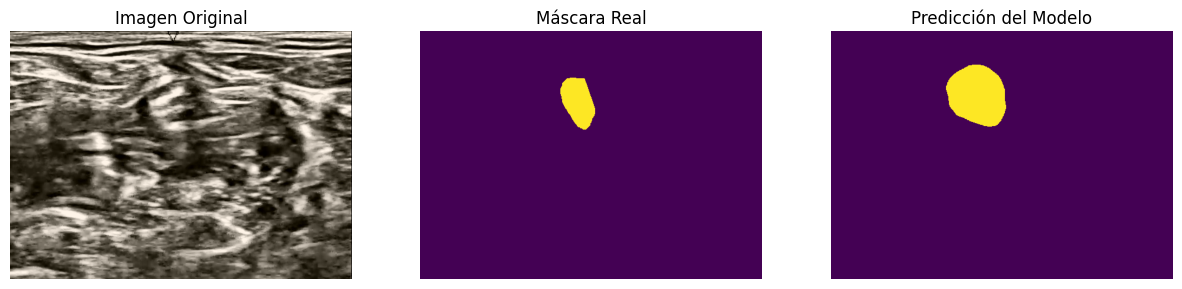

In [38]:
index_to_visualize = 1
img_test, mask_test = dataset_test[index_to_visualize]

# Mover la imagen al dispositivo (GPU o CPU) y añadir una dimensión de batch (B, C, H, W)
img_test_model = img_test.unsqueeze(0).to(device)

# Poner el modelo en modo evaluación
model.eval()

# Realizar la inferencia (sin calcular gradientes)
with torch.no_grad():
    output_test = model(img_test_model) # shape: [1, C, H, W]

# Obtener las predicciones (la clase con la puntuación más alta)
# La salida es (B, C, H, W), queremos (H, W) para visualizar
prediction_test = torch.argmax(output_test.squeeze(0), dim=0).cpu().numpy()

# Convertir la imagen original de vuelta a formato visualizable (quitar normalización, si se aplicó en el transform)
# Si usaste el mismo transform que para el entrenamiento y este incluye normalización,
# necesitas invertir la normalización para visualizar la imagen original.
# Si tu transform de test es diferente o no normaliza, puedes usar img_test.permute(1, 2, 0).numpy() directamente.

# Invertir la normalización para visualización:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img_test_np = img_test.permute(1, 2, 0).numpy() * std + mean
img_test_np = np.clip(img_test_np, 0, 1)

# Convertir la máscara real a numpy
mask_test_np = mask_test.numpy()

# Visualizar la imagen original, la máscara real y la predicción
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_test_np)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_test_np, cmap='viridis') # Usa el mismo mapa de colores que antes
plt.title("Máscara Real")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(prediction_test, cmap='viridis') # Usa el mismo mapa de colores
plt.title("Predicción del Modelo")
plt.axis('off')

plt.show()

In [39]:
!python --version

Python 3.12.12


# 9. GradCAM++

GradCAM application

In [40]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 137.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=45b8ba60be2548d7e3a480629b664a9cc18f3d34d2adfcbd99bf8d0add00df94
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [41]:
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import SemanticSegmentationTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# ========================================
# Initialize Grad-CAM++
# ========================================

cam = GradCAMPlusPlus(model=model, target_layers=target_layers)



# ========================================
# Prepare input from DataLoader
# ========================================

def prepare_image_for_visualization(input_tensor, mean=None, std=None):
    """
    Convert normalized tensor back to RGB image for visualization

    Args:
        input_tensor: Tensor of shape (1, C, H, W) or (C, H, W)
        mean: Mean used for normalization (default: ImageNet)
        std: Std used for normalization (default: ImageNet)

    Returns:
        rgb_img: Numpy array (H, W, 3) in range [0, 1]
    """
    if mean is None:
        mean = np.array([0.485, 0.456, 0.406])
    if std is None:
        std = np.array([0.229, 0.224, 0.225])

    # Handle batch dimension
    if input_tensor.dim() == 4:
        img_tensor = input_tensor[0]  # Take first image from batch
    else:
        img_tensor = input_tensor

    # Move to CPU and convert to numpy
    img_np = img_tensor.cpu().permute(1, 2, 0).numpy()

    # Denormalize
    img_np = (img_np * std) + mean

    # Clip to valid range
    img_np = np.clip(img_np, 0, 1)

    return img_np

from torch.utils.data import DataLoader

# Example: Process images from dataloader
for batch_idx, batch_data in enumerate(dataloader):
    # Unpack batch - adjust based on your dataloader structure
    # Common formats:
    # Option 1: (images, masks)
    # Option 2: {'image': images, 'mask': masks}
    # Option 3: (images, masks, metadata)

    if isinstance(batch_data, dict):
        images = batch_data['image']
        masks = batch_data['mask'] if 'mask' in batch_data else None
    elif isinstance(batch_data, (list, tuple)):
        images = batch_data[0]
        masks = batch_data[1] if len(batch_data) > 1 else None
    else:
        images = batch_data
        masks = None

    # Move to device
    images = images.to(device)

    # Process first image in batch (or loop through all)
    input_tensor = images[0:1]  # Keep batch dimension: (1, C, H, W)

    # Convert to RGB for visualization
    rgb_img = prepare_image_for_visualization(input_tensor)

    # Now you can use input_tensor and rgb_img with Grad-CAM++
    class_id = 1

    # Get prediction to create mask
    with torch.no_grad():
        output = model(input_tensor)
        prediction = torch.argmax(output, dim=1).cpu().numpy()[0]

    # Create mask for target class
    mask = (prediction == class_id).astype(np.float32)

    # Create target with both category and mask
    targets = [SemanticSegmentationTarget(class_id, mask)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0]
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # Save or display
    cv2.imwrite(f'gradcam_batch{batch_idx}.jpg', cv2.cvtColor(visualization, cv2.COLOR_RGB2BGR))

    # Save original image
    original_img_bgr = cv2.cvtColor((rgb_img * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'original_batch{batch_idx}.jpg', original_img_bgr)

    # Process only first batch for demo
    break